# Pandas

`Pandas` to kolejna biblioteka niezbędna do analizy danych w Pythonie. Dostarcza wydajne struktury danych, dzięki którym praca z danymi tabularycznymi staje się prosta i ituicyjna. Celem twórców jest utrzymanie statusu biblioteki niezbędnej do codziennych analiz oraz zdobycie fotela lidera w kategorii najpotężniejszego narzędzia open-source do analizy danych w jakimkolwiek języku programowania. Obecnie, projekt wciąż prężnie się rozwija i jego znajomość jest niezbędna dla każdego danologa.

`Pandas` będzie dobrym wyborem do następujących zastosowań:
* Dane tabularyczne (kolumny jak w SQLu lub Excelu)
* Dane reprezentujące szeregi czasowe
* Macierze,
* Wyniki pomiarów i statystyk.

Dwa główne typy danych w Pythonie to `Series` (jednowymiarowa kolumna) i `DataFrame` (dwuwymiarowa tabela). `Pandas` wykorzystuje w obliczeniach bibliotekę `NumPy` oraz jest przygotowany do integrowania się z wieloma bibliotekami zewnętrznymi.

Mocnymi stronami `Pandas` są między innymi:
* Prosta obsługa brakujących wartości (`NaN`),
* Możliwość modyfikowania rozmiaru `DataFrame`'a - możemy dodawać i usuwać kolumny i wiersze,
* Automatyczne wyrównywanie danych w obliczeniach (jak w `NumPy`),
* Metoda `groupBy` działająca analogicznie jak w SQLu,
* Łatwo stworzyć `DataFrame` na podstawie innego obiektu,
* Cięcie, indeksowanie i tworzenie podzbiorów,
* Łączenie (`join` i `merge`) zbiorów.


***
# pandas w pigułce

In [35]:
import numpy as np
import pandas as pd

pd.__version__

'1.1.2'

In [36]:
s = pd.Series([1,3,4,np.nan, 6, 8])
print(s)
dates = pd.date_range('20130101', periods=6)
print(dates)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2.dtypes

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01 -0.191588 -0.302354 -0.132436  0.848069
2013-01-02 -1.379849 -0.028883  0.467132 -0.911257
2013-01-03  1.506779  0.354289 -0.380718 -0.877691
2013-01-04  0.930137  0.444210  0.145806 -0.800338
2013-01-05 -1.863313 -0.424875 -0.270879  1.677414
2013-01-06 -1.112753  0.517976  1.501480  0.112224


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Przeglądanie danych
Do przeglądania `DataFrame` służą między innymi następujące pola i metody.

In [37]:
from IPython.display import display

display(df.head())
display(df.tail(3))

print(df.index)
print(df.columns)

,A,B,C,D
2013-01-01,-0.191588,-0.302354,-0.132436,0.848069
2013-01-02,-1.379849,-0.028883,0.467132,-0.911257
2013-01-03,1.506779,0.354289,-0.380718,-0.877691
2013-01-04,0.930137,0.444210,0.145806,-0.800338
2013-01-05,-1.863313,-0.424875,-0.270879,1.677414


,A,B,C,D
2013-01-04,0.930137,0.444210,0.145806,-0.800338
2013-01-05,-1.863313,-0.424875,-0.270879,1.677414
2013-01-06,-1.112753,0.517976,1.501480,0.112224


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


## DataFrame.to_numpy()
`DataFrame.to_numpy()` jest metodą, która zamienia `DataFrame` na tablicę. Problemem jest to, że o ile `DataFrame` może przechowywać dane różnego typu, o tyle `ndarray` ma jeden `dtype` na całą tablicę. W związku z tym, może się okazać, że zajdzie konieczność castowania wszystkich obiektów na `object`.

`df.to_numpy()` będzie operacją błyskawiczną, natomiast `df2.to_numpy()` będzie już relatywnie wolne.

In [38]:
%timeit df.to_numpy()
%timeit df2.to_numpy()

The slowest run took 13.16 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.68 µs per loop
1000 loops, best of 3: 492 µs per loop


Dostępnych jest również trochę funkcji użytkowych (util).

In [39]:
print(df.info())  # informacje o DF
print('----')
display(df.describe())  # opis statystyczny
print('----')
display(df.T)  # zamiana wierszy z kolumnami
print('----')
display(df.sort_index(axis=1, ascending=False))  # sortowanie wg indeksu
print('----')
display(df.sort_values(by='B'))  # sortowanie według kolumny

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes
None
----


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.351765,0.093394,0.221731,0.008070
std,1.344913,0.402884,0.697824,1.075771
min,-1.863313,-0.424875,-0.380718,-0.911257
25%,-1.313075,-0.233986,-0.236269,-0.858353
50%,-0.652171,0.162703,0.006685,-0.344057
75%,0.649706,0.421729,0.386800,0.664108
max,1.506779,0.517976,1.501480,1.677414


----


,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.191588,-1.379849,1.506779,0.930137,-1.863313,-1.112753
B,-0.302354,-0.028883,0.354289,0.444210,-0.424875,0.517976
C,-0.132436,0.467132,-0.380718,0.145806,-0.270879,1.501480
D,0.848069,-0.911257,-0.877691,-0.800338,1.677414,0.112224


----


,D,C,B,A
2013-01-01,0.848069,-0.132436,-0.302354,-0.191588
2013-01-02,-0.911257,0.467132,-0.028883,-1.379849
2013-01-03,-0.877691,-0.380718,0.354289,1.506779
2013-01-04,-0.800338,0.145806,0.444210,0.930137
2013-01-05,1.677414,-0.270879,-0.424875,-1.863313
2013-01-06,0.112224,1.501480,0.517976,-1.112753


----


,A,B,C,D
2013-01-05,-1.863313,-0.424875,-0.270879,1.677414
2013-01-01,-0.191588,-0.302354,-0.132436,0.848069
2013-01-02,-1.379849,-0.028883,0.467132,-0.911257
2013-01-03,1.506779,0.354289,-0.380718,-0.877691
2013-01-04,0.930137,0.444210,0.145806,-0.800338
2013-01-06,-1.112753,0.517976,1.501480,0.112224


## Pobieranie danych (select)

In [40]:
print(df['A']) # tylko kolumna A
print('----')
display(df[0:3]) # wiersze od 0 do 2
print('----')
display(df['20130102':'20130104'])  # od 2 do 3 stycznia
print('----')
print(df.loc[dates[0]])  # według wartości w indeksie
print('----')
display(df.loc[:, ['A', 'B']])  # wszystkie wiersze, ale tylko kolumny A i B
print('----')
display(df.loc['20130102':'20130104', ['A', 'B']])  # zakres wierszy
print('----')
print(df.loc['20130102', ['A', 'B']])  # tylko jeden wiersz
print('----')
print(df.loc[dates[0], 'A'])  # jedna komórka
print('----')
print(df.at[dates[0], 'A'])  # jedna komórka
print('----')
display(df.iloc[[3]])  # jeden wiersz, wg numeru wiersza jako DF
display(df.iloc[3])  # jako Series
print('----')
display(df.iloc[3:5, 0:2])  # według indeksów
print('----')
display(df[df.A < 0])  # indeksowanie warunkiem logicznym
print('----')
display(df[df > 0])  # szuka wartości mniejszych od zero

2013-01-01   -0.191588
2013-01-02   -1.379849
2013-01-03    1.506779
2013-01-04    0.930137
2013-01-05   -1.863313
2013-01-06   -1.112753
Freq: D, Name: A, dtype: float64
----


,A,B,C,D
2013-01-01,-0.191588,-0.302354,-0.132436,0.848069
2013-01-02,-1.379849,-0.028883,0.467132,-0.911257
2013-01-03,1.506779,0.354289,-0.380718,-0.877691


----


,A,B,C,D
2013-01-02,-1.379849,-0.028883,0.467132,-0.911257
2013-01-03,1.506779,0.354289,-0.380718,-0.877691
2013-01-04,0.930137,0.444210,0.145806,-0.800338


----
A   -0.191588
B   -0.302354
C   -0.132436
D    0.848069
Name: 2013-01-01 00:00:00, dtype: float64
----


,A,B
2013-01-01,-0.191588,-0.302354
2013-01-02,-1.379849,-0.028883
2013-01-03,1.506779,0.354289
2013-01-04,0.930137,0.444210
2013-01-05,-1.863313,-0.424875
2013-01-06,-1.112753,0.517976


----


,A,B
2013-01-02,-1.379849,-0.028883
2013-01-03,1.506779,0.354289
2013-01-04,0.930137,0.444210


----
A   -1.379849
B   -0.028883
Name: 2013-01-02 00:00:00, dtype: float64
----
-0.1915882039268286
----
-0.1915882039268286
----


,A,B,C,D
2013-01-04,0.930137,0.44421,0.145806,-0.800338


A    0.930137
B    0.444210
C    0.145806
D   -0.800338
Name: 2013-01-04 00:00:00, dtype: float64

----


,A,B
2013-01-04,0.930137,0.444210
2013-01-05,-1.863313,-0.424875


----


,A,B,C,D
2013-01-01,-0.191588,-0.302354,-0.132436,0.848069
2013-01-02,-1.379849,-0.028883,0.467132,-0.911257
2013-01-05,-1.863313,-0.424875,-0.270879,1.677414
2013-01-06,-1.112753,0.517976,1.501480,0.112224


----


,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.848069
2013-01-02,NaN,NaN,0.467132,NaN
2013-01-03,1.506779,0.354289,NaN,NaN
2013-01-04,0.930137,0.444210,0.145806,NaN
2013-01-05,NaN,NaN,NaN,1.677414
2013-01-06,NaN,0.517976,1.501480,0.112224


In [41]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
display(df2[df2['E'].isin(['two', 'four'])])  # wybór według wartości w komórkach

,A,B,C,D,E
2013-01-03,1.506779,0.354289,-0.380718,-0.877691,two
2013-01-05,-1.863313,-0.424875,-0.270879,1.677414,four


In [42]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
df['F'] = s1  # dodanie Series jako nowy wiersz
display(df)
print('----')

df.loc[:, 'D'] = np.array([5] * len(df))  # przypisanie numpy array
display(df)
print('----')

df[df > 0] = -df  # przypisanie ujemnych wartości tam gdzie są dodatnie
display(df)

,A,B,C,D,F
2013-01-01,-0.191588,-0.302354,-0.132436,0.848069,NaN
2013-01-02,-1.379849,-0.028883,0.467132,-0.911257,1.0
2013-01-03,1.506779,0.354289,-0.380718,-0.877691,2.0
2013-01-04,0.930137,0.444210,0.145806,-0.800338,3.0
2013-01-05,-1.863313,-0.424875,-0.270879,1.677414,4.0
2013-01-06,-1.112753,0.517976,1.501480,0.112224,5.0


----


,A,B,C,D,F
2013-01-01,-0.191588,-0.302354,-0.132436,5,NaN
2013-01-02,-1.379849,-0.028883,0.467132,5,1.0
2013-01-03,1.506779,0.354289,-0.380718,5,2.0
2013-01-04,0.930137,0.444210,0.145806,5,3.0
2013-01-05,-1.863313,-0.424875,-0.270879,5,4.0
2013-01-06,-1.112753,0.517976,1.501480,5,5.0


----


,A,B,C,D,F
2013-01-01,-0.191588,-0.302354,-0.132436,-5,NaN
2013-01-02,-1.379849,-0.028883,-0.467132,-5,-1.0
2013-01-03,-1.506779,-0.354289,-0.380718,-5,-2.0
2013-01-04,-0.930137,-0.444210,-0.145806,-5,-3.0
2013-01-05,-1.863313,-0.424875,-0.270879,-5,-4.0
2013-01-06,-1.112753,-0.517976,-1.501480,-5,-5.0


## Praca z brakującymi danymi

In [43]:
display(df)
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])  # wybierz nowy zakres indeksów z DF
display(df1)
df1.loc[dates[0]:dates[1], 'E'] = 1  # ustaw wartość w kolumnie E, w odpowiednich wierszach
display(df1)
df2 = df1.copy()

display(pd.isna(df1))  # sprawdź czy wartości są nan - do indeksowania warunkiem logicznym

display(df1.dropna(how='any'))  # usuń gdy nan jest gdziekolwiek; 'all' gdy tylko we wszystkich kolumnach
display(df2.fillna(value=5))  # wypełnij wartością value


,A,B,C,D,F
2013-01-01,-0.191588,-0.302354,-0.132436,-5,NaN
2013-01-02,-1.379849,-0.028883,-0.467132,-5,-1.0
2013-01-03,-1.506779,-0.354289,-0.380718,-5,-2.0
2013-01-04,-0.930137,-0.444210,-0.145806,-5,-3.0
2013-01-05,-1.863313,-0.424875,-0.270879,-5,-4.0
2013-01-06,-1.112753,-0.517976,-1.501480,-5,-5.0


,A,B,C,D,F,E
2013-01-01,-0.191588,-0.302354,-0.132436,-5,NaN,NaN
2013-01-02,-1.379849,-0.028883,-0.467132,-5,-1.0,NaN
2013-01-03,-1.506779,-0.354289,-0.380718,-5,-2.0,NaN
2013-01-04,-0.930137,-0.444210,-0.145806,-5,-3.0,NaN


,A,B,C,D,F,E
2013-01-01,-0.191588,-0.302354,-0.132436,-5,NaN,1.0
2013-01-02,-1.379849,-0.028883,-0.467132,-5,-1.0,1.0
2013-01-03,-1.506779,-0.354289,-0.380718,-5,-2.0,NaN
2013-01-04,-0.930137,-0.444210,-0.145806,-5,-3.0,NaN


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


,A,B,C,D,F,E
2013-01-02,-1.379849,-0.028883,-0.467132,-5,-1.0,1.0


,A,B,C,D,F,E
2013-01-01,-0.191588,-0.302354,-0.132436,-5,5.0,1.0
2013-01-02,-1.379849,-0.028883,-0.467132,-5,-1.0,1.0
2013-01-03,-1.506779,-0.354289,-0.380718,-5,-2.0,5.0
2013-01-04,-0.930137,-0.444210,-0.145806,-5,-3.0,5.0


## Operacje

In [44]:
print(df.mean())  # domyślnie - dla kolumn
print('----')
print(df.mean(axis=1))  # dla wierszy
print('----')
display(df.apply(np.cumsum))
print('----')
print(df.apply(lambda x: x.max() - x.min()))

A   -1.164070
B   -0.345431
C   -0.483075
D   -5.000000
F   -3.000000
dtype: float64
----
2013-01-01   -1.406595
2013-01-02   -1.575173
2013-01-03   -1.848357
2013-01-04   -1.904031
2013-01-05   -2.311813
2013-01-06   -2.626442
Freq: D, dtype: float64
----


,A,B,C,D,F
2013-01-01,-0.191588,-0.302354,-0.132436,-5,NaN
2013-01-02,-1.571438,-0.331236,-0.599568,-10,-1.0
2013-01-03,-3.078216,-0.685525,-0.980286,-15,-3.0
2013-01-04,-4.008353,-1.129735,-1.126092,-20,-6.0
2013-01-05,-5.871666,-1.554610,-1.396971,-25,-10.0
2013-01-06,-6.984419,-2.072586,-2.898451,-30,-15.0


----
A    1.671724
B    0.489093
C    1.369044
D    0.000000
F    4.000000
dtype: float64


## Łączenie i grupowanie DataFrame

In [45]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]  # podział wg wierszy
print(pieces)
display(pd.concat(pieces))  # konkatenacja
print('----')

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
display(left)
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]}) 
display(right)
merged = pd.merge(left, right, on='key')  # łączenie wg wspólnej kolumny
display(merged)
print('----')

df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
print(s)
df.append(s, ignore_index=True)  # dodaj wiersz, ignorując indeks
display(df)
print('----')


df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

display(df.groupby('A').sum())

display(df.groupby(['A', 'B']).sum())

[          0         1         2         3
0  0.754535  2.245910  0.099433 -0.358970
1 -0.391134 -0.431635  0.118935 -1.331167
2 -1.619057  0.518472 -1.091943 -0.449121,           0         1         2         3
3  0.184545 -0.205919  1.373309  1.415783
4  0.394316  0.566152  1.509177  0.018798
5  0.431779  0.609599  0.334000 -0.743312
6 -0.126898 -0.761389  0.418910 -0.612867,           0         1         2         3
7 -1.319359  0.091406  1.705447 -0.187552
8  1.112590 -0.291194 -0.965123  1.063993
9  0.140637  0.787007  1.031509 -0.695747]


,0,1,2,3
0,0.754535,2.245910,0.099433,-0.358970
1,-0.391134,-0.431635,0.118935,-1.331167
2,-1.619057,0.518472,-1.091943,-0.449121
3,0.184545,-0.205919,1.373309,1.415783
4,0.394316,0.566152,1.509177,0.018798
5,0.431779,0.609599,0.334000,-0.743312
6,-0.126898,-0.761389,0.418910,-0.612867
7,-1.319359,0.091406,1.705447,-0.187552
8,1.112590,-0.291194,-0.965123,1.063993
9,0.140637,0.787007,1.031509,-0.695747


----


,key,lval
0,foo,1
1,foo,2


,key,rval
0,foo,4
1,foo,5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


----
A   -0.890953
B   -0.240488
C   -1.570279
D    1.202424
Name: 3, dtype: float64


,A,B,C,D
0,-1.388841,-1.756565,0.001690,-0.628495
1,1.776895,0.928123,-0.764655,-1.097825
2,1.150588,-0.025826,-1.010728,-0.953356
3,-0.890953,-0.240488,-1.570279,1.202424
4,1.469213,-1.931153,-1.848587,-0.681541
5,-0.959721,0.237378,-0.343937,1.571873
6,-1.023248,-0.279193,-0.607586,-0.219265
7,-0.097704,-0.049784,-0.557121,-1.107459


----


,C,D
A,,
bar,4.280558,1.246515
foo,0.340047,-0.442878


C         D
A   B                        
bar one    1.609100 -0.864783
    three  0.007669  0.325175
    two    2.663789  1.786123
foo one    2.087845  0.539025
    three -1.806195 -0.527831
    two    0.058398 -0.454072

## Cechy kategoryczne

In [46]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
display(df)
print('----')
df["grade"] = df["raw_grade"].astype("category")  # konwersja do typu kategorii
display(df)
print('----')

df["grade"].cat.categories = ["very good", "good", "very bad"]  # ustawienie kategorii
display(df)
print('----')

display(df.sort_values(by="grade")) # sortowanie według zmiennej kategorycznej
print('----')
display(df.groupby("grade").size()) # grupowanie według wartości zmiennej kategorycznej

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


----


,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


----


,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


----


,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


----


grade
very good    3
good         2
very bad     1
dtype: int64

## Wizualizacje

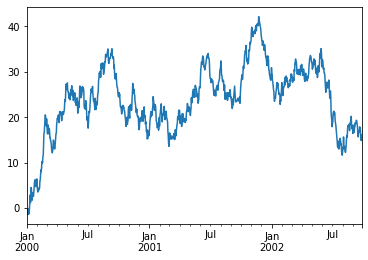

In [47]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()  # zwykły wykres

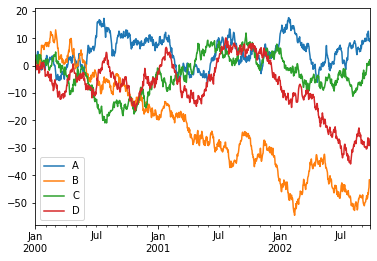

In [48]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()  #dla wielu wymiarów

## Wczytywanie `DataFrame` z pliku i zapis do pliku

In [49]:
df.to_csv('foo.csv')  # zapis do pliku

pd.read_csv('foo.csv')  # wczytywanie pliku
df.to_excel('foo.xlsx', sheet_name='Sheet1')  # zapis do formatu Excela

# Tutorial

In [50]:
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


**1. Najpierw importujemy niezbędne biblioteki**

In [51]:
import numpy as np
import pandas as pd  # konwencja

W pandasie mamy do czynienia z dwoma typami struktur: Series i Dataframes

**Series** to jednowymiarowa struktura danych (jednowymiarowa macierz numpy), która oprócz danych przechowuje też unikalny indeks. Taką serię możemy utworzyć następująco:

In [52]:
pd.Series(np.random.random(10))

0    0.782679
1    0.264932
2    0.416074
3    0.248456
4    0.779001
5    0.431796
6    0.878265
7    0.759441
8    0.535319
9    0.539518
dtype: float64

Drugą strukturą w pandas jest **DataFrame** - czyli dwu lub więcej wymiarowa struktura danych, najczęściej w formie tabeli z wierszami i kolumnami. Kolumny mają nazwy, a wiersze mają indeksy.

W tym szkoleniu skupimy się właśnie na DataFramach.

**2. Pierwszy krok jest zwykle ten sam. Dane są przechowywane w plikach csv, tsv, bazach danych, plikach excel itd. Wczytać je można np. z użyciem funkcji `pd.read_csv`**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [53]:
from IPython.display import display

# plik tsv - rozdzielony tabulatorami
chipotle = pd.read_csv('ML-datasets/chipotle.tsv', sep='\t')
# interesujące parametry: delimiter lub sep (alias), header (czy zawiera linię z opisem kolumn)
# names (lista kolumn), index_col (wybiera daną kolumnę jako indeks)
# usecols (wykorzystuje tylko określone kolumny)
display(chipotle)  # wyświetlamy - macierz z danymi różnych typów
display(chipotle.head())
display(chipotle.tail(3))
display(chipotle.sample(5))

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


,order_id,quantity,item_name,choice_description,item_price
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


,order_id,quantity,item_name,choice_description,item_price
3886,1558,1,6 Pack Soft Drink,[Diet Coke],$6.49
766,316,1,Canned Soft Drink,[Sprite],$1.25
3035,1207,1,Chips and Guacamole,NaN,$4.45
412,180,1,Steak Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Chees...",$11.48
702,289,1,Chicken Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",$8.75


Wczytamy teraz dataset `read_from`

In [54]:
read = pd.read_csv('ML-datasets/read_from.csv', sep=';',
                  names=['time', 'status', 'country', 'identifier', 'how', 'continent'],
                  parse_dates=True, index_col='time')

display(read.sample(5))

,status,country,identifier,how,continent
time,,,,,
2018-01-01 16:18:06,read,country_5,2458152463,AdWords,South America
2018-01-01 22:19:42,read,country_2,2458152915,Reddit,Europe
2018-01-01 13:34:35,read,country_2,2458152267,AdWords,Europe
2018-01-01 02:43:16,read,country_6,2458151449,SEO,Australia
2018-01-01 20:09:13,read,country_5,2458152736,Reddit,Asia


In [55]:
display(read[['country', 'how']])  # wybór wielu kolumn
display(read[['continent']])  # dataframe
display(read['continent'])  # Series
display(read.continent)  # Series

,country,how
time,,
2018-01-01 00:01:01,country_7,SEO
2018-01-01 00:03:20,country_7,SEO
2018-01-01 00:04:01,country_7,AdWords
2018-01-01 00:04:02,country_7,AdWords
2018-01-01 00:05:03,country_8,Reddit
...,...,...
2018-01-01 23:57:14,country_2,AdWords
2018-01-01 23:58:33,country_8,SEO
2018-01-01 23:59:36,country_6,Reddit


,continent
time,
2018-01-01 00:01:01,North America
2018-01-01 00:03:20,South America
2018-01-01 00:04:01,Africa
2018-01-01 00:04:02,Europe
2018-01-01 00:05:03,North America
...,...
2018-01-01 23:57:14,North America
2018-01-01 23:58:33,Asia
2018-01-01 23:59:36,Asia


time
2018-01-01 00:01:01    North America
2018-01-01 00:03:20    South America
2018-01-01 00:04:01           Africa
2018-01-01 00:04:02           Europe
2018-01-01 00:05:03    North America
                           ...      
2018-01-01 23:57:14    North America
2018-01-01 23:58:33             Asia
2018-01-01 23:59:36             Asia
2018-01-01 23:59:36           Europe
2018-01-01 23:59:38             Asia
Name: continent, Length: 1795, dtype: object

time
2018-01-01 00:01:01    North America
2018-01-01 00:03:20    South America
2018-01-01 00:04:01           Africa
2018-01-01 00:04:02           Europe
2018-01-01 00:05:03    North America
                           ...      
2018-01-01 23:57:14    North America
2018-01-01 23:58:33             Asia
2018-01-01 23:59:36             Asia
2018-01-01 23:59:36           Europe
2018-01-01 23:59:38             Asia
Name: continent, Length: 1795, dtype: object

W pandasie istnieją co najmniej 4 metody pobierania danych. Pierwsza z nich to zwykłe nawiasy kwadratowe (jak wyżej). Można również w nawiasach podawać warunek logiczny.

In [56]:
print(read.how == 'SEO')  # Series z wartościami True/False według wierszy
display(read[read.how == 'SEO'])  # Wyświetla wszystkie wiersze dla których było True


time
2018-01-01 00:01:01     True
2018-01-01 00:03:20     True
2018-01-01 00:04:01    False
2018-01-01 00:04:02    False
2018-01-01 00:05:03    False
                       ...  
2018-01-01 23:57:14    False
2018-01-01 23:58:33     True
2018-01-01 23:59:36    False
2018-01-01 23:59:36    False
2018-01-01 23:59:38    False
Name: how, Length: 1795, dtype: bool


,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2018-01-01 00:08:57,read,country_7,2458151272,SEO,Australia
2018-01-01 00:11:22,read,country_7,2458151276,SEO,North America
2018-01-01 00:13:05,read,country_8,2458151277,SEO,North America
...,...,...,...,...,...
2018-01-01 23:45:58,read,country_7,2458153033,SEO,South America
2018-01-01 23:49:52,read,country_5,2458153038,SEO,North America
2018-01-01 23:51:25,read,country_4,2458153040,SEO,South America


Teoretycznie, wiele operacji można wykonywać sekwencyjnie, gdyż większość z nich zwraca wynikową DataFrame.

In [57]:
read.head()[['country', 'identifier']]

,country,identifier
time,,
2018-01-01 00:01:01,country_7,2458151261
2018-01-01 00:03:20,country_7,2458151262
2018-01-01 00:04:01,country_7,2458151263
2018-01-01 00:04:02,country_7,2458151264
2018-01-01 00:05:03,country_8,2458151265


Możemy też wyświetlić indeks i listę kolumn

In [58]:
print(read.columns)
print(read.index)

Index(['status', 'country', 'identifier', 'how', 'continent'], dtype='object')
DatetimeIndex(['2018-01-01 00:01:01', '2018-01-01 00:03:20',
               '2018-01-01 00:04:01', '2018-01-01 00:04:02',
               '2018-01-01 00:05:03', '2018-01-01 00:05:42',
               '2018-01-01 00:06:06', '2018-01-01 00:06:15',
               '2018-01-01 00:07:21', '2018-01-01 00:07:29',
               ...
               '2018-01-01 23:54:26', '2018-01-01 23:54:39',
               '2018-01-01 23:54:45', '2018-01-01 23:55:04',
               '2018-01-01 23:56:42', '2018-01-01 23:57:14',
               '2018-01-01 23:58:33', '2018-01-01 23:59:36',
               '2018-01-01 23:59:36', '2018-01-01 23:59:38'],
              dtype='datetime64[ns]', name='time', length=1795, freq=None)


Różne metody wyboru elementów 

In [59]:
dates = read.index
print(read['identifier']) # tylko kolumna A
print('----')
display(read[0:3]) # wiersze od 0 do 2
print('----')
display(read['2018-01-01 12:00':'2018-01-01 12:10'])
print('----')
display(read.loc[:, ['country', 'continent']])  # wszystkie wiersze, ale tylko kolumny A i B
print('----')
display(read.loc[dates[0], 'country'])
print('----')
display(read.loc['2018-01-01 12:00':'2018-01-01 12:10', ['country', 'continent']])  # zakres wierszy
print('----')
print(read.loc['2018-01-01 12:00', ['country', 'continent']])  # tylko jeden wiersz
print('----')
print(read.loc[dates[0], 'country'])  # jedna komórka
print('----')
print(read.at[dates[0], 'country'])  # jedna komórka
print('----')
display(read.iloc[[3]])  # jeden wiersz, wg numeru wiersza jako DF
display(read.iloc[3])  # jako Series
print('----')
display(read.iloc[3:5, 0:2])  # według indeksów
print('----')
display(read[read.country == 'country_2'])  # indeksowanie warunkiem logicznym
print('----')
display(read[read != 'Asia'])  # szuka wartości różnych od ''

time
2018-01-01 00:01:01    2458151261
2018-01-01 00:03:20    2458151262
2018-01-01 00:04:01    2458151263
2018-01-01 00:04:02    2458151264
2018-01-01 00:05:03    2458151265
                          ...    
2018-01-01 23:57:14    2458153051
2018-01-01 23:58:33    2458153052
2018-01-01 23:59:36    2458153053
2018-01-01 23:59:36    2458153054
2018-01-01 23:59:38    2458153055
Name: identifier, Length: 1795, dtype: int64
----


,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa


----


,status,country,identifier,how,continent
time,,,,,
2018-01-01 12:00:07,read,country_6,2458152147,Reddit,Australia
2018-01-01 12:00:14,read,country_7,2458152148,AdWords,Africa
2018-01-01 12:00:30,read,country_7,2458152149,Reddit,South America
2018-01-01 12:01:43,read,country_8,2458152150,SEO,North America
2018-01-01 12:01:50,read,country_5,2458152151,AdWords,South America
2018-01-01 12:02:25,read,country_2,2458152152,Reddit,South America
2018-01-01 12:02:40,read,country_7,2458152153,Reddit,Australia
2018-01-01 12:02:43,read,country_7,2458152154,AdWords,South America
2018-01-01 12:02:50,read,country_2,2458152155,Reddit,Africa


----


,country,continent
time,,
2018-01-01 00:01:01,country_7,North America
2018-01-01 00:03:20,country_7,South America
2018-01-01 00:04:01,country_7,Africa
2018-01-01 00:04:02,country_7,Europe
2018-01-01 00:05:03,country_8,North America
...,...,...
2018-01-01 23:57:14,country_2,North America
2018-01-01 23:58:33,country_8,Asia
2018-01-01 23:59:36,country_6,Asia


----


'country_7'

----


,country,continent
time,,
2018-01-01 12:00:07,country_6,Australia
2018-01-01 12:00:14,country_7,Africa
2018-01-01 12:00:30,country_7,South America
2018-01-01 12:01:43,country_8,North America
2018-01-01 12:01:50,country_5,South America
2018-01-01 12:02:25,country_2,South America
2018-01-01 12:02:40,country_7,Australia
2018-01-01 12:02:43,country_7,South America
2018-01-01 12:02:50,country_2,Africa


----
                       country      continent
time                                         
2018-01-01 12:00:07  country_6      Australia
2018-01-01 12:00:14  country_7         Africa
2018-01-01 12:00:30  country_7  South America
----
country_7
----
country_7
----


,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe


status              read
country        country_7
identifier    2458151264
how              AdWords
continent         Europe
Name: 2018-01-01 00:04:02, dtype: object

----


,status,country
time,,
2018-01-01 00:04:02,read,country_7
2018-01-01 00:05:03,read,country_8


----


,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:06:06,read,country_2,2458151267,Reddit,Europe
2018-01-01 00:09:29,read,country_2,2458151274,Reddit,Europe
2018-01-01 00:13:06,read,country_2,2458151278,Reddit,Asia
2018-01-01 00:14:53,read,country_2,2458151280,Reddit,Asia
2018-01-01 00:15:44,read,country_2,2458151281,Reddit,Asia
...,...,...,...,...,...
2018-01-01 23:53:03,read,country_2,2458153043,AdWords,Asia
2018-01-01 23:54:03,read,country_2,2458153045,SEO,North America
2018-01-01 23:54:26,read,country_2,2458153046,AdWords,Africa


----


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa
2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe
2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America
...,...,...,...,...,...
2018-01-01 23:57:14,read,country_2,2458153051,AdWords,North America
2018-01-01 23:58:33,read,country_8,2458153052,SEO,NaN
2018-01-01 23:59:36,read,country_6,2458153053,Reddit,NaN


Porównanie czasu działania numpy i pandas

In [60]:
# Import numpy
import numpy as np

iris = pd.read_csv('ML-datasets/iris.csv')
iris.pop('species')
f1 = lambda x: np.log10(x.to_numpy())
f2 = lambda x: np.log10(x)


In [61]:
# Create array of DataFrame values: np_vals with log10
%timeit f1(iris)

# Create array of new DataFrame by passing df to np.log10(): df_log10
%timeit f2(iris)

The slowest run took 5.96 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 22.9 µs per loop
The slowest run took 4.04 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 89.7 µs per loop


## Agregacja danych
Jest to proces łączenia wartości ze zbioru danych (lub jego podzbioru) w jedną wartość. Przykładowo, mając listę samochodów można zagregować kolumnę ceny do łącznej wartości wszystkich samochodów.

In [62]:
import numpy as np
import pandas as pd

In [63]:
cars = pd.read_csv('ML-datasets/auto_mpg.csv', na_values='?')
display(cars)

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,28.0


Metoda `count` służy do zliczania liczby elementów w Series. Dlatego, też dla całego DataFrame zwróci wartości dla poszczególnych kolumn.

In [64]:
print(cars.count())

print('----')

# aby uzyskać jedną wartość - wystarczy wybrać jedną kolumnę
print(cars[['mpg']].count())
print(cars.count().mpg)
print(cars.mpg.count())

cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
modelyear       398
origin          398
mpg             398
dtype: int64
----
mpg    398
dtype: int64
398
398


Możemy łatwo zsumować wszystkie wartości, zarówno w kolumnie, jak i macierzy, ustalić wartość maksymalną i minimalną, średnią czy też medianę.

In [65]:
print(cars.weight.sum())
print(cars.sum())
print('----')
print(cars.cylinders.min())
print(cars.min())
print('----')
print(cars.acceleration.max())
print(cars.max())
print('----')
print(cars.modelyear.mean())
print(cars.mean())
print('----')
print(cars.mpg.median())
print(cars.median())

1182229.0
cylinders          2171.0
displacement      76983.5
horsepower        40952.0
weight          1182229.0
acceleration       6196.1
modelyear         30252.0
origin              626.0
mpg                9358.8
dtype: float64
----
3
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
modelyear         70.0
origin             1.0
mpg                9.0
dtype: float64
----
24.8
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
modelyear         82.0
origin             3.0
mpg               46.6
dtype: float64
----
76.01005025125629
cylinders          5.454774
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
modelyear         76.010050
origin             1.572864
mpg               23.514573
dtype: float64
----
23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight     

Jako Data Scientists od czasu do czasu trzeba wykonać segmentację bazy danych. Oprócz wyznaczania statystyk dla wszystkich wartości, czasem można te wartości pogrupować. W pandasie służy do tego metoda groupby.

In [66]:
display(cars.groupby('cylinders').mean().horsepower)
display(cars.groupby('modelyear').max()[['acceleration']])

cylinders
3     99.250000
4     78.281407
5     82.333333
6    101.506024
8    158.300971
Name: horsepower, dtype: float64

,acceleration
modelyear,
70,20.5
71,20.5
72,23.5
73,21.0
74,21.0
75,21.0
76,22.2
77,19.0
78,21.5


W jaki sposób najczęście czytano w zbiorze `read`?

In [67]:
read.groupby('how').count()[['identifier']]

,identifier
how,
AdWords,500
Reddit,949
SEO,346


Jaka była najczęstsza kombinacja źródła i tematu dla kraju `country_2`?

In [68]:
read[read.country == 'country_2'].groupby(['how', 'continent']).count()[['identifier']]

identifier
how     continent                
AdWords Africa                  3
        Asia                   31
        Australia               6
        Europe                 46
        North America          11
        South America          14
Reddit  Africa                 24
        Asia                  139
        Australia              18
        Europe                 29
        North America          27
        South America          26
SEO     Africa                  7
        Asia                    9
        Australia              10
        Europe                  4
        North America          42
        South America          16

## Łączenie dataframes

W rzeczywistości często nie chcemy korzystać z jednej dużej bazy, lecz łączymy wiele mniejszych (łatwiej jest nimi zarządzać, unikać redundancji, dodatkowo oczędzamy miejsce na dysku i osiągamy większą szybkość.

W Pandasie do łączenia dwóch tabel wykorzystujemy funkcję `merge`, która w swoich założeniach jest bardzo podobna do SQL-owego JOINa.

In [69]:
import pandas as pd
import numpy as np

In [70]:
zoo = pd.read_csv('ML-datasets/zoo.csv')
zoo.animal.unique()

array(['elephant', 'tiger', 'zebra', 'lion', 'kangaroo'], dtype=object)

In [71]:
zoo_eats = pd.DataFrame({'animal': ['elephant', 'tiger', 'zebra', 'giraffe', 'kangaroo'],
                         'food': ['vegetables', 'meat', 'vegetables', 'vegetables', 'vegetables']})
zoo_eats

,animal,food
0,elephant,vegetables
1,tiger,meat
2,zebra,vegetables
3,giraffe,vegetables
4,kangaroo,vegetables


In [72]:
zoo.merge(zoo_eats)  # zniknęły lwy, bo nie było ich w zoo_eats

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [73]:
zoo_eats.merge(zoo)  # inna kolejność kolumn

,animal,food,uniq_id,water_need
0,elephant,vegetables,1001,500
1,elephant,vegetables,1002,600
2,elephant,vegetables,1003,550
3,tiger,meat,1004,300
4,tiger,meat,1005,320
5,tiger,meat,1006,330
6,tiger,meat,1007,290
7,tiger,meat,1008,310
8,zebra,vegetables,1009,200
9,zebra,vegetables,1010,220


In [74]:
# strategie merge:
# inner
zoo.merge(zoo_eats, how='inner')  # domyślne: część wspólna kolumn

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [75]:
# outer
zoo.merge(zoo_eats, how='outer')  # pojawiły się nany - suma

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


In [76]:
# left będą dla wartości z zoo
zoo.merge(zoo_eats, how='left')


,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [77]:
# right - odwrotnie
zoo.merge(zoo_eats, how='right')

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


In [78]:
# wykorzystywana kolumna
# domyślnie pandas próbuje sam znaleźć, ale często trzeba to zrobić ręcznie
zoo.merge(zoo_eats, how='outer', left_on='animal', right_on='animal')

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


Sortowanie w Pandasie

In [79]:
cars.sort_values('cylinders')

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
111,3,70.0,90.0,2124.0,13.5,73,3,18.0
71,3,70.0,97.0,2330.0,13.5,72,3,19.0
334,3,70.0,100.0,2420.0,12.5,80,3,23.7
243,3,80.0,110.0,2720.0,13.5,77,3,21.5
267,4,134.0,95.0,2560.0,14.2,78,3,27.5
...,...,...,...,...,...,...,...,...
86,8,304.0,150.0,3672.0,11.5,73,1,14.0
285,8,305.0,130.0,3840.0,15.4,79,1,17.0
286,8,302.0,129.0,3725.0,13.4,79,1,17.6
92,8,351.0,158.0,4363.0,13.0,73,1,13.0


In [80]:
# sortowanie po wielu kolumnach, według kolejności podania
cars.sort_values(by=['cylinders', 'mpg'])

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
111,3,70.0,90.0,2124.0,13.5,73,3,18.0
71,3,70.0,97.0,2330.0,13.5,72,3,19.0
243,3,80.0,110.0,2720.0,13.5,77,3,21.5
334,3,70.0,100.0,2420.0,12.5,80,3,23.7
76,4,121.0,112.0,2933.0,14.5,72,2,18.0
...,...,...,...,...,...,...,...,...
165,8,262.0,110.0,3221.0,13.5,75,1,20.0
251,8,302.0,139.0,3570.0,12.8,78,1,20.2
298,8,350.0,125.0,3900.0,17.4,79,1,23.0
300,8,260.0,90.0,3420.0,22.2,79,1,23.9


In [81]:
# sortowanie malejące
cars.sort_values('horsepower', ascending=False)

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
116,8,400.0,230.0,4278.0,9.5,73,1,16.0
95,8,455.0,225.0,4951.0,11.0,73,1,12.0
13,8,455.0,225.0,3086.0,10.0,70,1,14.0
8,8,455.0,225.0,4425.0,10.0,70,1,14.0
6,8,454.0,220.0,4354.0,9.0,70,1,14.0
...,...,...,...,...,...,...,...,...
126,6,200.0,NaN,2875.0,17.0,74,1,21.0
330,4,85.0,NaN,1835.0,17.3,80,2,40.9
336,4,140.0,NaN,2905.0,14.3,80,1,23.6
354,4,100.0,NaN,2320.0,15.8,81,2,34.5


In [82]:
# można by było zresetować indeksy
cars.sort_values('horsepower', ascending=False).reset_index()
# nie tylko że są brzydkie, ale mogą też pomieszać dostęp według numeru indeksu, czy też wizualizacje

,index,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
0,116,8,400.0,230.0,4278.0,9.5,73,1,16.0
1,95,8,455.0,225.0,4951.0,11.0,73,1,12.0
2,13,8,455.0,225.0,3086.0,10.0,70,1,14.0
3,8,8,455.0,225.0,4425.0,10.0,70,1,14.0
4,6,8,454.0,220.0,4354.0,9.0,70,1,14.0
...,...,...,...,...,...,...,...,...,...
393,126,6,200.0,NaN,2875.0,17.0,74,1,21.0
394,330,4,85.0,NaN,1835.0,17.3,80,2,40.9
395,336,4,140.0,NaN,2905.0,14.3,80,1,23.6
396,354,4,100.0,NaN,2320.0,15.8,81,2,34.5


In [83]:
# usuwanie starego indeksu
cars.sort_values('horsepower', ascending=False).reset_index(drop=True)


,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
0,8,400.0,230.0,4278.0,9.5,73,1,16.0
1,8,455.0,225.0,4951.0,11.0,73,1,12.0
2,8,455.0,225.0,3086.0,10.0,70,1,14.0
3,8,455.0,225.0,4425.0,10.0,70,1,14.0
4,8,454.0,220.0,4354.0,9.0,70,1,14.0
...,...,...,...,...,...,...,...,...
393,6,200.0,NaN,2875.0,17.0,74,1,21.0
394,4,85.0,NaN,1835.0,17.3,80,2,40.9
395,4,140.0,NaN,2905.0,14.3,80,1,23.6
396,4,100.0,NaN,2320.0,15.8,81,2,34.5


In [84]:
# radzenie sobie z wartościami NaN
# wypełnianie wartości NaN
zoo.merge(zoo_eats, how='left').fillna('meat')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [85]:
# dropna
zoo.merge(zoo_eats, how='right').dropna()

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


# Zadania

**1. Porównywanie pd.Series**

Utwórz dwa obiekty typu `pd.Series`, zawierające 100 wartości 0 lub 1. Wykorzystaj w tym celu generator liczb losowych z biblioteki NumPy [np.random.randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html#numpy-random-randint).

Następnie wyświetl wszystkie indeksy, na których wartości w obu Series się zgadzają.

In [86]:
import numpy as np
import pandas as pd

a = pd.Series(np.random.randint(2, size=100))
b = pd.Series(np.random.randint(2, size=100))
a[a == b].index

Int64Index([ 2,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 18, 21, 22, 25, 26, 27,
            28, 29, 31, 33, 34, 35, 41, 42, 44, 45, 47, 48, 49, 50, 51, 53, 55,
            57, 59, 63, 65, 68, 69, 70, 74, 75, 77, 79, 81, 82, 83, 85, 86, 87,
            90, 91, 92, 93, 94, 96],
           dtype='int64')

**2. Zbiór chipotle - kto zapłacił najwięcej?**

Wczytaj zbiór chipotle i dodaj kolumne `price_dollars`, zawierającą cenę w dolarach. Następnie sprawdź, które z zamówień opiewało na najwyższą kwotę (wykorzystaj w tym celu grupowanie i wybraną agregację). Podaj jego indeks (`order_id`) oraz wartość zamówienia.

In [89]:
import pandas as pd

dolarizer = lambda x: float(x[1:])

chipotle = pd.read_csv('ML-datasets/chipotle.tsv', sep='\t')
chipotle['price_dollars'] = chipotle.item_price.apply(dolarizer)
price_summed = chipotle.groupby('order_id').price_dollars.sum()
print(f'Order {price_summed.idxmax()}: {price_summed.max()}')

Order 926: 205.25


**3. Łączenie DataFrames**

Wczytaj zbiory danych `rating.csv` oraz `parking.csv`. Spróbuj połączyć je wykorzystując metodę `merge`. Pamiętaj o odpowiedniej nazwie kol

In [88]:
import pandas as pd

rating = pd.read_csv('ML-datasets/rating.csv')
parking = pd.read_csv('ML-datasets/parking.csv')

merged = rating.merge(parking, how='left', on='placeID')
merged.sample(5)

,userID,placeID,rating,food_rating,service_rating,parking_lot
413,U1005,132830,1,1,0,none
1157,U1011,132715,1,1,0,none
934,U1004,132955,2,2,2,none
820,U1089,132754,1,1,1,none
886,U1137,135058,0,2,2,public


In [88]:
a